In [1]:
"""
A randomly connected network

This example contains a reservoir network of 4500 neurons, distributed over 2 Loihi chips.
3600 neurons are excitatory and 900 neurons are inhibitory.
The weights are initialized randomly, based on a log-normal distribution.
The network activity is started with a short cue input and then maintained.

The experiment is defined in pelenet/experiments/random.py file.
An experiment can contain multiple network instances.
A log file, parameters, and plot figures are stored in the log folder for every run of the simulation.

NOTE: The main README file contains some more information about the structure of pelenet
"""

# Load pelenet modules
from pelenet.experiments.random import RandomExperiment

# Official modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Overwrite default parameters (pelenet/parameters/ and pelenet/experiments/random.py)
parameters = {
    # Experiment
    'seed': 1,  # Random seed
    'trials': 1,  # Number of trials
    'stepsPerTrial': 600,  # Number of simulation steps for every trial
    # Network
    'reservoirExSize': 400,
    'reservoirConnPerNeuron': 35,  # Number of connections per neuron
    'reservoirConnProb': None,  # Connection probability
    # Neurons
    'refractoryDelay': 2, # Refactory period
    'voltageTau': 4,  # Voltage time constant
    'currentTau': 1,  # Current time constant
    'thresholdMant': 70,  # Spiking threshold for membrane potential
    # Input
    'inputType': 'uniform',
    'inputGenSpikeProb': 0.2,
    'inputNumTargetNeurons': 50,
    'inputNumGenerators': 10,
    'inputSteps': 5,
    # Probes
    'isExSpikeProbe': True,  # Probe excitatory spikes
    'isInSpikeProbe': True  # Probe inhibitory spikes
}

In [3]:
# Initilizes the experiment, also initializes the log
# Creating a new object results in a new log entry in the 'log' folder
# The name is optional, it is extended to the folder in the log directory
exp = RandomExperiment(name='random-network', parameters=parameters)

In [4]:
# Build the network, in this function the weight matrix, inputs, probes, etc. are defined and created
exp.build()

In [5]:
# Run the network simulation, afterwards the probes are postprocessed to nice arrays
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:39549
INFO:DRV:      Host server up..............Done 0.02s
INFO:DRV:      Compiling Embedded snips....Done 0.09s
INFO:DRV:      Encoding axons/synapses.....Done 0.31s
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1599515770.8187633/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.46s
INFO:DRV:      Encoding probes.............Done 2.07ms
INFO:DRV:      Transferring spikes.........Done 6.64ms
INFO:DRV:      Configuring registers.......Done 0.40s
INFO:DRV:      Transferring probes.........Done 7.32ms
INFO:DRV:      Executing...................Done 6.60s
INFO:DRV:      Processing timeseries.......Done 0.06s
INFO:DRV:  Executor: 600 timesteps.........Done 8.97s
INFO:HST:  chip=0 cpu=0 halted, status=0x0


In [6]:
# Some important data, stored in the network (part of the experiment)

# Excitatory spike trains
print(np.shape(exp.net.exSpikeTrains))
# Inhibitory spike trains
print(np.shape(exp.net.inSpikeTrains))

# Initial random weights, stored in a sparse matrix
print(np.shape(exp.net.initialWeights.exex))  # Connections between excitatory neurons
print(np.shape(exp.net.initialWeights.exin))  # Connections from excitatory to inhibitory neurons
print(np.shape(exp.net.initialWeights.inex))  # Connections from inhibitory to excitatory neurons
print(np.shape(exp.net.initialWeights.inin))  # Connections between inhibitory neurons

(400, 600)
(100, 600)
(400, 400)
(100, 400)
(400, 100)
(100, 100)


In [7]:
np.sum(exp.net.exSpikeTrains)

686

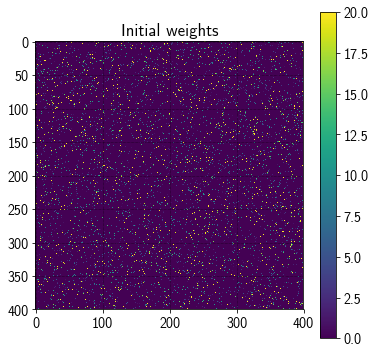

In [8]:
# Randomly created weights, used for the network simulation
exp.net.plot.initialExWeightMatrix()

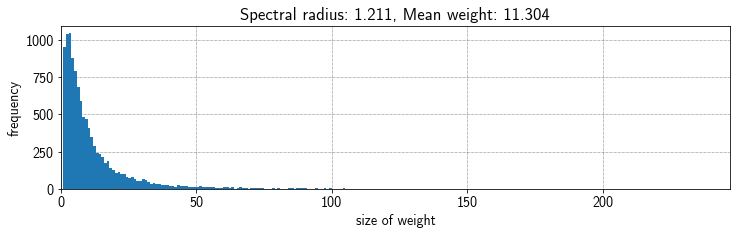

In [9]:
# Plot distribution of weights
exp.net.plot.initialExWeightDistribution(figsize=(12,3))

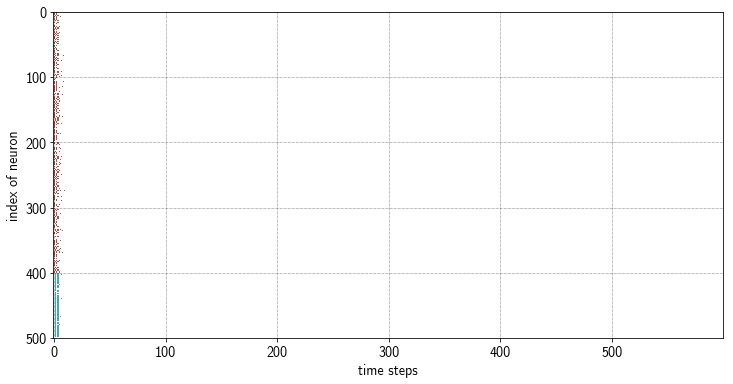

In [10]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirSpikeTrain(figsize=(12,6))

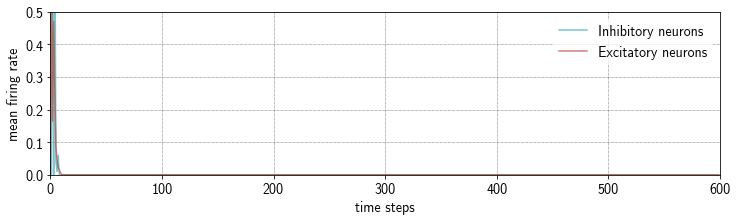

In [11]:
# Plot firing rates of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirRates(figsize=(12,3), ylim=(0,0.5))

In [12]:
#np.set_printoptions(threshold=np.inf)
exp.net.inputSpikes

[array([2, 3]),
 array([0, 2]),
 array([2, 3]),
 array([], dtype=int64),
 array([2]),
 array([0]),
 array([1]),
 array([1]),
 array([], dtype=int64),
 array([0])]